In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 一.筛选出IH 并按照Volume选出主力合约

In [34]:
original_data = pd.read_csv("FFUT_FDT.csv")
cleaned_data = original_data.copy()
cleaned_data = cleaned_data[cleaned_data['Agmtcd'].str.startswith('IH')]
cleaned_data = cleaned_data.loc[cleaned_data.groupby('Trddt')['Volume'].idxmax()]
cleaned_data

,Trddt,Agmtcd,Trdvar_en,Exhcd,Deldt,Opnprc,Hiprc,Loprc,Clsprc,Stprc,Ystprc,Updown1,Updown2,Volume,Opint,Yopint,Chopint,Turnover
4848,2015-04-16,IH1505,SSE 50 Index Futures,CFFEX,2015-05-15,3100.0,3288.2,3088.8,3283.8,3223.6,3058.8,225.0,164.8,144423,28848,0,28848,1.377287e+07
4864,2015-04-17,IH1505,SSE 50 Index Futures,CFFEX,2015-05-15,3303.6,3341.6,3238.0,3254.0,3280.8,3223.6,30.4,57.2,271224,37853,28848,9005,2.675521e+07
4871,2015-04-20,IH1505,SSE 50 Index Futures,CFFEX,2015-05-15,3258.0,3315.0,3143.6,3146.8,3176.8,3280.8,-134.0,-104.0,267213,37975,37853,122,2.605294e+07
4883,2015-04-21,IH1505,SSE 50 Index Futures,CFFEX,2015-05-15,3176.8,3242.2,3153.0,3234.0,3211.2,3176.8,57.2,34.4,239311,37771,37975,-204,2.293201e+07
4895,2015-04-22,IH1505,SSE 50 Index Futures,CFFEX,2015-05-15,3250.0,3333.2,3229.8,3308.0,3309.6,3211.2,96.8,98.4,239676,42623,37771,4852,2.354757e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37445,2025-06-30,IH2509,SSE 50 Index Futures,CFFEX,2025-09-19,2683.2,2690.8,2670.2,2689.0,2687.6,2681.8,7.2,5.8,22994,49133,53070,-3937,1.850947e+06
37461,2025-07-01,IH2509,SSE 50 Index Futures,CFFEX,2025-09-19,2691.0,2696.6,2680.6,2689.8,2692.6,2687.6,2.2,5.0,17755,48099,49133,-1034,1.432359e+06
37477,2025-07-02,IH2509,SSE 50 Index Futures,CFFEX,2025-09-19,2692.0,2701.2,2683.0,2696.8,2696.8,2692.6,4.2,4.2,20389,47699,48099,-400,1.647659e+06
37493,2025-07-03,IH2509,SSE 50 Index Futures,CFFEX,2025-09-19,2700.0,2704.4,2688.0,2701.8,2700.4,2696.8,5.0,3.6,19650,46778,47699,-921,1.590251e+06


# 二.计算N

### 先计算 Ann std = σ 

In [35]:
#计算 IH_daily_rr
cleaned_data['IH_daily_rr'] = (cleaned_data['Stprc'] - cleaned_data['Ystprc']) / cleaned_data['Ystprc']
cleaned_data

,Trddt,Agmtcd,Trdvar_en,Exhcd,Deldt,Opnprc,Hiprc,Loprc,Clsprc,Stprc,Ystprc,Updown1,Updown2,Volume,Opint,Yopint,Chopint,Turnover,IH_daily_rr
4848,2015-04-16,IH1505,SSE 50 Index Futures,CFFEX,2015-05-15,3100.0,3288.2,3088.8,3283.8,3223.6,3058.8,225.0,164.8,144423,28848,0,28848,1.377287e+07,0.053877
4864,2015-04-17,IH1505,SSE 50 Index Futures,CFFEX,2015-05-15,3303.6,3341.6,3238.0,3254.0,3280.8,3223.6,30.4,57.2,271224,37853,28848,9005,2.675521e+07,0.017744
4871,2015-04-20,IH1505,SSE 50 Index Futures,CFFEX,2015-05-15,3258.0,3315.0,3143.6,3146.8,3176.8,3280.8,-134.0,-104.0,267213,37975,37853,122,2.605294e+07,-0.031700
4883,2015-04-21,IH1505,SSE 50 Index Futures,CFFEX,2015-05-15,3176.8,3242.2,3153.0,3234.0,3211.2,3176.8,57.2,34.4,239311,37771,37975,-204,2.293201e+07,0.010829
4895,2015-04-22,IH1505,SSE 50 Index Futures,CFFEX,2015-05-15,3250.0,3333.2,3229.8,3308.0,3309.6,3211.2,96.8,98.4,239676,42623,37771,4852,2.354757e+07,0.030643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37445,2025-06-30,IH2509,SSE 50 Index Futures,CFFEX,2025-09-19,2683.2,2690.8,2670.2,2689.0,2687.6,2681.8,7.2,5.8,22994,49133,53070,-3937,1.850947e+06,0.002163
37461,2025-07-01,IH2509,SSE 50 Index Futures,CFFEX,2025-09-19,2691.0,2696.6,2680.6,2689.8,2692.6,2687.6,2.2,5.0,17755,48099,49133,-1034,1.432359e+06,0.001860
37477,2025-07-02,IH2509,SSE 50 Index Futures,CFFEX,2025-09-19,2692.0,2701.2,2683.0,2696.8,2696.8,2692.6,4.2,4.2,20389,47699,48099,-400,1.647659e+06,0.001560
37493,2025-07-03,IH2509,SSE 50 Index Futures,CFFEX,2025-09-19,2700.0,2704.4,2688.0,2701.8,2700.4,2696.8,5.0,3.6,19650,46778,47699,-921,1.590251e+06,0.001335


In [36]:
#计算 daily_std
daily_std = cleaned_data['IH_daily_rr'].std()
Ann_std = daily_std * np.sqrt(252)
σ = Ann_std
σ

0.21704189192140919

## 再计算τ

In [37]:
# 1.保证金水平允许的风险
Multiplier = 300
Margin = 0.08

τ1 = (Multiplier * cleaned_data['Stprc'] * σ) / (Multiplier * cleaned_data['Stprc'] * Margin)
τ1 = σ / Margin
τ1

2.713023649017615

In [38]:
#审慎杠杆允许的风险
worst_r = min(cleaned_data['IH_daily_rr'])
τ2 = (σ * 0.2) / abs(worst_r)
τ2 

0.43596701067077004

In [39]:
#预期表现下的最优风险（半凯利公式）
#SR  是用annual算 不是daily算
daily_avg_return = cleaned_data['IH_daily_rr'].mean()
mean_ann_return = daily_avg_return * 252
SR = (mean_ann_return/Ann_std)

τ3 = 0.5 * SR
τ3

0.11731973841494499

In [40]:
#默认个人风险 or 直接采用推荐值20%
τ4 = 0.2

In [41]:
τ =  τ4
τ

0.2

## 最后算N

In [42]:
Capital =10000000
N = (Capital * τ ) / (Multiplier * cleaned_data['Stprc']* σ) 
N = round(N,0)
cleaned_data['N'] = N
cleaned_data['N'] = cleaned_data['N'].shift(1) #基于前一天算出的 N 作为今天买入的合约数量
cleaned_data.iat[0,-1]=1
cleaned_data

,Trddt,Agmtcd,Trdvar_en,Exhcd,Deldt,Opnprc,Hiprc,Loprc,Clsprc,Stprc,Ystprc,Updown1,Updown2,Volume,Opint,Yopint,Chopint,Turnover,IH_daily_rr,N
4848,2015-04-16,IH1505,SSE 50 Index Futures,CFFEX,2015-05-15,3100.0,3288.2,3088.8,3283.8,3223.6,3058.8,225.0,164.8,144423,28848,0,28848,1.377287e+07,0.053877,1.0
4864,2015-04-17,IH1505,SSE 50 Index Futures,CFFEX,2015-05-15,3303.6,3341.6,3238.0,3254.0,3280.8,3223.6,30.4,57.2,271224,37853,28848,9005,2.675521e+07,0.017744,10.0
4871,2015-04-20,IH1505,SSE 50 Index Futures,CFFEX,2015-05-15,3258.0,3315.0,3143.6,3146.8,3176.8,3280.8,-134.0,-104.0,267213,37975,37853,122,2.605294e+07,-0.031700,9.0
4883,2015-04-21,IH1505,SSE 50 Index Futures,CFFEX,2015-05-15,3176.8,3242.2,3153.0,3234.0,3211.2,3176.8,57.2,34.4,239311,37771,37975,-204,2.293201e+07,0.010829,10.0
4895,2015-04-22,IH1505,SSE 50 Index Futures,CFFEX,2015-05-15,3250.0,3333.2,3229.8,3308.0,3309.6,3211.2,96.8,98.4,239676,42623,37771,4852,2.354757e+07,0.030643,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37445,2025-06-30,IH2509,SSE 50 Index Futures,CFFEX,2025-09-19,2683.2,2690.8,2670.2,2689.0,2687.6,2681.8,7.2,5.8,22994,49133,53070,-3937,1.850947e+06,0.002163,11.0
37461,2025-07-01,IH2509,SSE 50 Index Futures,CFFEX,2025-09-19,2691.0,2696.6,2680.6,2689.8,2692.6,2687.6,2.2,5.0,17755,48099,49133,-1034,1.432359e+06,0.001860,11.0
37477,2025-07-02,IH2509,SSE 50 Index Futures,CFFEX,2025-09-19,2692.0,2701.2,2683.0,2696.8,2696.8,2692.6,4.2,4.2,20389,47699,48099,-400,1.647659e+06,0.001560,11.0
37493,2025-07-03,IH2509,SSE 50 Index Futures,CFFEX,2025-09-19,2700.0,2704.4,2688.0,2701.8,2700.4,2696.8,5.0,3.6,19650,46778,47699,-921,1.590251e+06,0.001335,11.0


# 三.计算表格内数据

In [43]:
#Percentage return
cleaned_data['returns'] = (cleaned_data['Stprc']- cleaned_data['Ystprc']) * cleaned_data['N'] * Multiplier
cleaned_data

,Trddt,Agmtcd,Trdvar_en,Exhcd,Deldt,Opnprc,Hiprc,Loprc,Clsprc,Stprc,...,Updown1,Updown2,Volume,Opint,Yopint,Chopint,Turnover,IH_daily_rr,N,returns
4848,2015-04-16,IH1505,SSE 50 Index Futures,CFFEX,2015-05-15,3100.0,3288.2,3088.8,3283.8,3223.6,...,225.0,164.8,144423,28848,0,28848,1.377287e+07,0.053877,1.0,49440.0
4864,2015-04-17,IH1505,SSE 50 Index Futures,CFFEX,2015-05-15,3303.6,3341.6,3238.0,3254.0,3280.8,...,30.4,57.2,271224,37853,28848,9005,2.675521e+07,0.017744,10.0,171600.0
4871,2015-04-20,IH1505,SSE 50 Index Futures,CFFEX,2015-05-15,3258.0,3315.0,3143.6,3146.8,3176.8,...,-134.0,-104.0,267213,37975,37853,122,2.605294e+07,-0.031700,9.0,-280800.0
4883,2015-04-21,IH1505,SSE 50 Index Futures,CFFEX,2015-05-15,3176.8,3242.2,3153.0,3234.0,3211.2,...,57.2,34.4,239311,37771,37975,-204,2.293201e+07,0.010829,10.0,103200.0
4895,2015-04-22,IH1505,SSE 50 Index Futures,CFFEX,2015-05-15,3250.0,3333.2,3229.8,3308.0,3309.6,...,96.8,98.4,239676,42623,37771,4852,2.354757e+07,0.030643,10.0,295200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37445,2025-06-30,IH2509,SSE 50 Index Futures,CFFEX,2025-09-19,2683.2,2690.8,2670.2,2689.0,2687.6,...,7.2,5.8,22994,49133,53070,-3937,1.850947e+06,0.002163,11.0,19140.0
37461,2025-07-01,IH2509,SSE 50 Index Futures,CFFEX,2025-09-19,2691.0,2696.6,2680.6,2689.8,2692.6,...,2.2,5.0,17755,48099,49133,-1034,1.432359e+06,0.001860,11.0,16500.0
37477,2025-07-02,IH2509,SSE 50 Index Futures,CFFEX,2025-09-19,2692.0,2701.2,2683.0,2696.8,2696.8,...,4.2,4.2,20389,47699,48099,-400,1.647659e+06,0.001560,11.0,13860.0
37493,2025-07-03,IH2509,SSE 50 Index Futures,CFFEX,2025-09-19,2700.0,2704.4,2688.0,2701.8,2700.4,...,5.0,3.6,19650,46778,47699,-921,1.590251e+06,0.001335,11.0,11880.0


In [44]:
cleaned_data.iat[0,-1] = 0
cleaned_data['capital_t'] = cleaned_data['returns'].cumsum() + 10000000
cleaned_data.iat[0,-1] = 10000000
cleaned_data['capital_t'] = cleaned_data['capital_t'].shift(1)
cleaned_data

,Trddt,Agmtcd,Trdvar_en,Exhcd,Deldt,Opnprc,Hiprc,Loprc,Clsprc,Stprc,...,Updown2,Volume,Opint,Yopint,Chopint,Turnover,IH_daily_rr,N,returns,capital_t
4848,2015-04-16,IH1505,SSE 50 Index Futures,CFFEX,2015-05-15,3100.0,3288.2,3088.8,3283.8,3223.6,...,164.8,144423,28848,0,28848,1.377287e+07,0.053877,1.0,0.0,NaN
4864,2015-04-17,IH1505,SSE 50 Index Futures,CFFEX,2015-05-15,3303.6,3341.6,3238.0,3254.0,3280.8,...,57.2,271224,37853,28848,9005,2.675521e+07,0.017744,10.0,171600.0,10000000.0
4871,2015-04-20,IH1505,SSE 50 Index Futures,CFFEX,2015-05-15,3258.0,3315.0,3143.6,3146.8,3176.8,...,-104.0,267213,37975,37853,122,2.605294e+07,-0.031700,9.0,-280800.0,10171600.0
4883,2015-04-21,IH1505,SSE 50 Index Futures,CFFEX,2015-05-15,3176.8,3242.2,3153.0,3234.0,3211.2,...,34.4,239311,37771,37975,-204,2.293201e+07,0.010829,10.0,103200.0,9890800.0
4895,2015-04-22,IH1505,SSE 50 Index Futures,CFFEX,2015-05-15,3250.0,3333.2,3229.8,3308.0,3309.6,...,98.4,239676,42623,37771,4852,2.354757e+07,0.030643,10.0,295200.0,9994000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37445,2025-06-30,IH2509,SSE 50 Index Futures,CFFEX,2025-09-19,2683.2,2690.8,2670.2,2689.0,2687.6,...,5.8,22994,49133,53070,-3937,1.850947e+06,0.002163,11.0,19140.0,14398360.0
37461,2025-07-01,IH2509,SSE 50 Index Futures,CFFEX,2025-09-19,2691.0,2696.6,2680.6,2689.8,2692.6,...,5.0,17755,48099,49133,-1034,1.432359e+06,0.001860,11.0,16500.0,14417500.0
37477,2025-07-02,IH2509,SSE 50 Index Futures,CFFEX,2025-09-19,2692.0,2701.2,2683.0,2696.8,2696.8,...,4.2,20389,47699,48099,-400,1.647659e+06,0.001560,11.0,13860.0,14434000.0
37493,2025-07-03,IH2509,SSE 50 Index Futures,CFFEX,2025-09-19,2700.0,2704.4,2688.0,2701.8,2700.4,...,3.6,19650,46778,47699,-921,1.590251e+06,0.001335,11.0,11880.0,14447860.0


In [45]:
cleaned_data['p_ret'] = cleaned_data['returns']/cleaned_data['capital_t']
cleaned_data

,Trddt,Agmtcd,Trdvar_en,Exhcd,Deldt,Opnprc,Hiprc,Loprc,Clsprc,Stprc,...,Volume,Opint,Yopint,Chopint,Turnover,IH_daily_rr,N,returns,capital_t,p_ret
4848,2015-04-16,IH1505,SSE 50 Index Futures,CFFEX,2015-05-15,3100.0,3288.2,3088.8,3283.8,3223.6,...,144423,28848,0,28848,1.377287e+07,0.053877,1.0,0.0,NaN,NaN
4864,2015-04-17,IH1505,SSE 50 Index Futures,CFFEX,2015-05-15,3303.6,3341.6,3238.0,3254.0,3280.8,...,271224,37853,28848,9005,2.675521e+07,0.017744,10.0,171600.0,10000000.0,0.017160
4871,2015-04-20,IH1505,SSE 50 Index Futures,CFFEX,2015-05-15,3258.0,3315.0,3143.6,3146.8,3176.8,...,267213,37975,37853,122,2.605294e+07,-0.031700,9.0,-280800.0,10171600.0,-0.027606
4883,2015-04-21,IH1505,SSE 50 Index Futures,CFFEX,2015-05-15,3176.8,3242.2,3153.0,3234.0,3211.2,...,239311,37771,37975,-204,2.293201e+07,0.010829,10.0,103200.0,9890800.0,0.010434
4895,2015-04-22,IH1505,SSE 50 Index Futures,CFFEX,2015-05-15,3250.0,3333.2,3229.8,3308.0,3309.6,...,239676,42623,37771,4852,2.354757e+07,0.030643,10.0,295200.0,9994000.0,0.029538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37445,2025-06-30,IH2509,SSE 50 Index Futures,CFFEX,2025-09-19,2683.2,2690.8,2670.2,2689.0,2687.6,...,22994,49133,53070,-3937,1.850947e+06,0.002163,11.0,19140.0,14398360.0,0.001329
37461,2025-07-01,IH2509,SSE 50 Index Futures,CFFEX,2025-09-19,2691.0,2696.6,2680.6,2689.8,2692.6,...,17755,48099,49133,-1034,1.432359e+06,0.001860,11.0,16500.0,14417500.0,0.001144
37477,2025-07-02,IH2509,SSE 50 Index Futures,CFFEX,2025-09-19,2692.0,2701.2,2683.0,2696.8,2696.8,...,20389,47699,48099,-400,1.647659e+06,0.001560,11.0,13860.0,14434000.0,0.000960
37493,2025-07-03,IH2509,SSE 50 Index Futures,CFFEX,2025-09-19,2700.0,2704.4,2688.0,2701.8,2700.4,...,19650,46778,47699,-921,1.590251e+06,0.001335,11.0,11880.0,14447860.0,0.000822


In [46]:
daily_avg_return = cleaned_data['p_ret'].mean()
daily_avg_return
mean_ann_return = daily_avg_return * 252
mean_ann_return

0.05627034049734465

In [47]:
#Average_drawdowm
cleaned_data["IH_daily_drawdowm"] = (cleaned_data['Hiprc'] - cleaned_data['Loprc'])/cleaned_data['Hiprc']
Average_drawdowm = cleaned_data["IH_daily_drawdowm"].mean()
Average_drawdowm

0.01714429494489592

In [48]:
#新的 Ann std
daily_std = cleaned_data['p_ret'].std()
Ann_std = daily_std * np.sqrt(252)
Ann_std

0.19237484723752127

In [49]:
#新的 SR  
SR = (mean_ann_return/Ann_std)
SR

0.2925036266714682

In [50]:
#SKEW
skewness = cleaned_data['p_ret'].skew()
skewness

-0.5197503610868515

In [51]:
# lower&upper tail, lower&upper percentile ratio 2015
# 取20xx年的计算df_20xx = cleaned_data.copy()

df_20xx = cleaned_data[cleaned_data['Trddt'].str.startswith('2015')]
df_20xx["p_ret"] = df_20xx["p_ret"]- daily_avg_return
df_20xx = df_20xx.reset_index()
df_20xx

/var/folders/02/tp9zyfnd75v0cdl4kt6z44dc0000gn/T/ipykernel_1704/1549695872.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_20xx["p_ret"] = df_20xx["p_ret"]- daily_avg_return


,index,Trddt,Agmtcd,Trdvar_en,Exhcd,Deldt,Opnprc,Hiprc,Loprc,Clsprc,...,Opint,Yopint,Chopint,Turnover,IH_daily_rr,N,returns,capital_t,p_ret,IH_daily_drawdowm
0,4848,2015-04-16,IH1505,SSE 50 Index Futures,CFFEX,2015-05-15,3100.0,3288.2,3088.8,3283.8,...,28848,0,28848,1.377287e+07,0.053877,1.0,0.0,NaN,NaN,0.060641
1,4864,2015-04-17,IH1505,SSE 50 Index Futures,CFFEX,2015-05-15,3303.6,3341.6,3238.0,3254.0,...,37853,28848,9005,2.675521e+07,0.017744,10.0,171600.0,10000000.0,0.016937,0.031003
2,4871,2015-04-20,IH1505,SSE 50 Index Futures,CFFEX,2015-05-15,3258.0,3315.0,3143.6,3146.8,...,37975,37853,122,2.605294e+07,-0.031700,9.0,-280800.0,10171600.0,-0.027830,0.051704
3,4883,2015-04-21,IH1505,SSE 50 Index Futures,CFFEX,2015-05-15,3176.8,3242.2,3153.0,3234.0,...,37771,37975,-204,2.293201e+07,0.010829,10.0,103200.0,9890800.0,0.010211,0.027512
4,4895,2015-04-22,IH1505,SSE 50 Index Futures,CFFEX,2015-05-15,3250.0,3333.2,3229.8,3308.0,...,42623,37771,4852,2.354757e+07,0.030643,10.0,295200.0,9994000.0,0.029314,0.031021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,6914,2015-12-25,IH1601,SSE 50 Index Futures,CFFEX,2016-01-15,2458.0,2480.8,2454.0,2480.8,...,11240,11338,-98,3.540431e+05,0.005451,12.0,48240.0,9059740.0,0.005101,0.010803
173,6926,2015-12-28,IH1601,SSE 50 Index Futures,CFFEX,2016-01-15,2468.2,2479.6,2377.0,2379.8,...,11555,11240,315,4.391944e+05,-0.030345,12.0,-270000.0,9107980.0,-0.029868,0.041378
174,6938,2015-12-29,IH1601,SSE 50 Index Futures,CFFEX,2016-01-15,2395.6,2422.6,2388.8,2411.0,...,11706,11555,151,4.064688e+05,0.007177,13.0,67080.0,8837980.0,0.007367,0.013952
175,6950,2015-12-30,IH1601,SSE 50 Index Futures,CFFEX,2016-01-15,2417.4,2422.6,2386.0,2404.6,...,11588,11706,-118,4.221781e+05,-0.003480,13.0,-32760.0,8905060.0,-0.003902,0.015108


In [52]:
row_count = len(df_20xx)
row_count

177

In [53]:
data = np.arange(0,row_count,1)
left_value = df_20xx.iloc[int(np.percentile(data, 30)), -2]
right_value = df_20xx.iloc[int(np.percentile(data, 70)), -2]
value1st = df_20xx.iloc[int(np.percentile(data, 1)), -2]
value99st = df_20xx.iloc[int(np.percentile(data, 99)),-2]
lower_pr = value1st / left_value
upper_pr = value99st / right_value
print(lower_pr,upper_pr)

-0.44254889348778204 -1.0666032619605705


In [54]:
lower_tail = lower_pr/4.43
upper_tail = upper_pr/4.43
print(lower_tail,upper_tail)

-0.09989817008753546 -0.24076823069087372


In [55]:
df1 = pd.DataFrame({'Strategy: Buy and hold, single contract': ['Years of data', 'Mean annual return','Average drawdown',
                                                               'Annualised standard deviation','Sharpe ratio','Skew','Lower tail'
                                                               ,'Upper tail'], 'SSE 50 future': ['10', "{:.2%}".format(mean_ann_return) ,
                                                                                                 "{:.2%}".format(-Average_drawdowm),
                                                                                                 "{:.2%}".format(Ann_std)
                                                                                                ,round(SR, 2),round(skewness, 2),
                                                                                                 round(lower_tail,2),round(upper_tail,2)]})
df1.set_index('Strategy: Buy and hold, single contract', inplace=True)
df1

,SSE 50 future
"Strategy: Buy and hold, single contract",
Years of data,10
Mean annual return,5.63%
Average drawdown,-1.71%
Annualised standard deviation,19.24%
Sharpe ratio,0.29
Skew,-0.52
Lower tail,-0.1
Upper tail,-0.24


# 四.Account curve (cumulated sum of percentage returns)

In [56]:
#Account curve (cumulated sum of percentage returns)
cumulative_return = (1 + cleaned_data["p_ret"]).cumprod()-1
cumulative_return

4848          NaN
4864     0.017160
4871    -0.010920
4883    -0.000600
4895     0.028920
           ...   
37445    0.441750
37461    0.443400
37477    0.444786
37493    0.445974
37509    0.449538
Name: p_ret, Length: 2485, dtype: float64

In [57]:
df = pd.DataFrame(cumulative_return)
df['Trddt'] = cleaned_data['Trddt']
df

,p_ret,Trddt
4848,NaN,2015-04-16
4864,0.017160,2015-04-17
4871,-0.010920,2015-04-20
4883,-0.000600,2015-04-21
4895,0.028920,2015-04-22
...,...,...
37445,0.441750,2025-06-30
37461,0.443400,2025-07-01
37477,0.444786,2025-07-02
37493,0.445974,2025-07-03


/var/folders/02/tp9zyfnd75v0cdl4kt6z44dc0000gn/T/ipykernel_1704/447977395.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


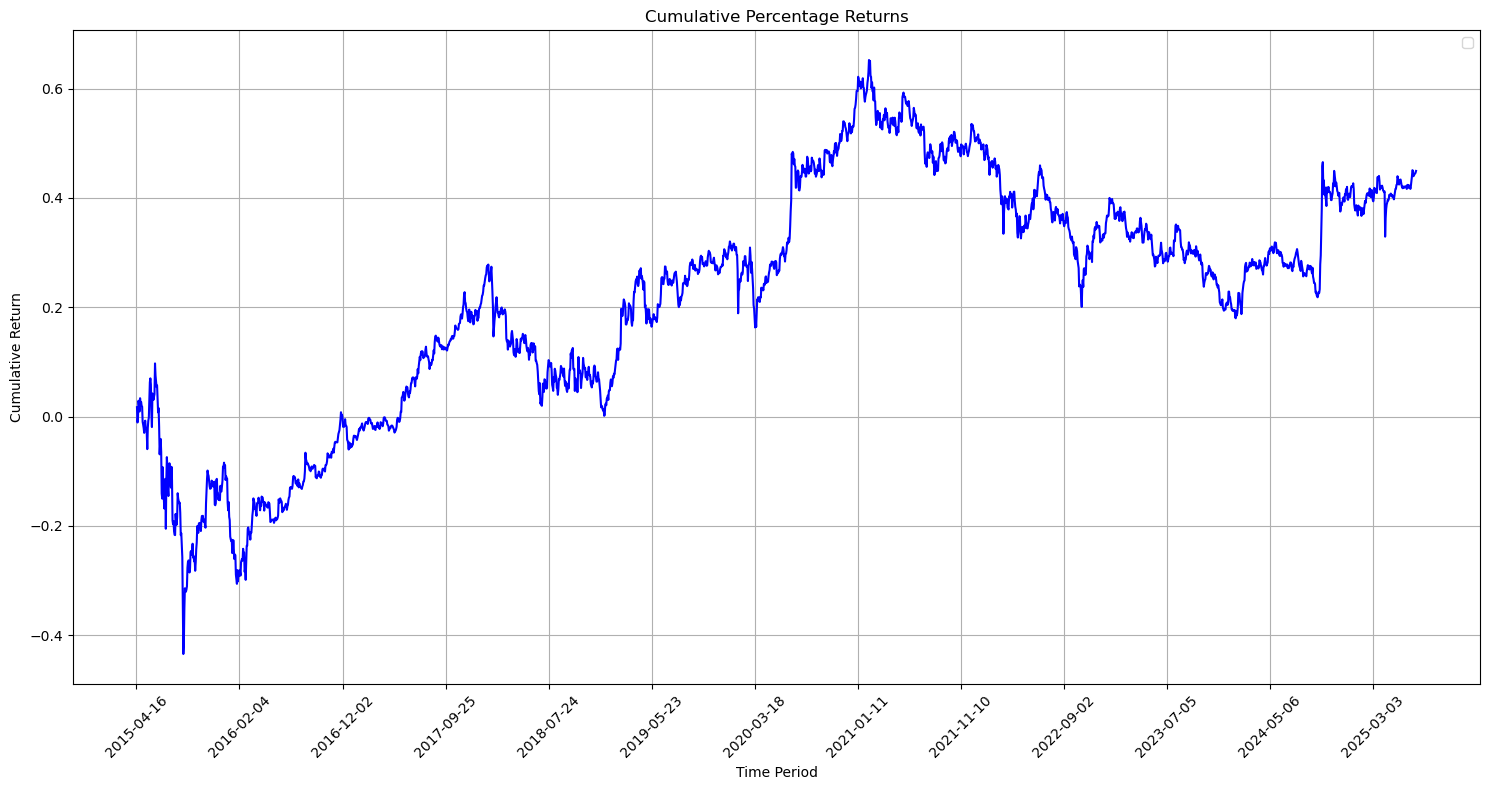

In [58]:
plt.figure(figsize=(15, 8))
plt.plot(df['Trddt'], df['p_ret'],'b-')
plt.title("Cumulative Percentage Returns")
plt.ylabel("Cumulative Return")
plt.xlabel("Time Period")
plt.xticks(df['Trddt'][::200], rotation=45)
plt.tight_layout()
plt.grid(True)
plt.legend()
plt.show()

 # 五.Oprimal risk given expected performance

In [59]:
cleaned_data

,Trddt,Agmtcd,Trdvar_en,Exhcd,Deldt,Opnprc,Hiprc,Loprc,Clsprc,Stprc,...,Opint,Yopint,Chopint,Turnover,IH_daily_rr,N,returns,capital_t,p_ret,IH_daily_drawdowm
4848,2015-04-16,IH1505,SSE 50 Index Futures,CFFEX,2015-05-15,3100.0,3288.2,3088.8,3283.8,3223.6,...,28848,0,28848,1.377287e+07,0.053877,1.0,0.0,NaN,NaN,0.060641
4864,2015-04-17,IH1505,SSE 50 Index Futures,CFFEX,2015-05-15,3303.6,3341.6,3238.0,3254.0,3280.8,...,37853,28848,9005,2.675521e+07,0.017744,10.0,171600.0,10000000.0,0.017160,0.031003
4871,2015-04-20,IH1505,SSE 50 Index Futures,CFFEX,2015-05-15,3258.0,3315.0,3143.6,3146.8,3176.8,...,37975,37853,122,2.605294e+07,-0.031700,9.0,-280800.0,10171600.0,-0.027606,0.051704
4883,2015-04-21,IH1505,SSE 50 Index Futures,CFFEX,2015-05-15,3176.8,3242.2,3153.0,3234.0,3211.2,...,37771,37975,-204,2.293201e+07,0.010829,10.0,103200.0,9890800.0,0.010434,0.027512
4895,2015-04-22,IH1505,SSE 50 Index Futures,CFFEX,2015-05-15,3250.0,3333.2,3229.8,3308.0,3309.6,...,42623,37771,4852,2.354757e+07,0.030643,10.0,295200.0,9994000.0,0.029538,0.031021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37445,2025-06-30,IH2509,SSE 50 Index Futures,CFFEX,2025-09-19,2683.2,2690.8,2670.2,2689.0,2687.6,...,49133,53070,-3937,1.850947e+06,0.002163,11.0,19140.0,14398360.0,0.001329,0.007656
37461,2025-07-01,IH2509,SSE 50 Index Futures,CFFEX,2025-09-19,2691.0,2696.6,2680.6,2689.8,2692.6,...,48099,49133,-1034,1.432359e+06,0.001860,11.0,16500.0,14417500.0,0.001144,0.005933
37477,2025-07-02,IH2509,SSE 50 Index Futures,CFFEX,2025-09-19,2692.0,2701.2,2683.0,2696.8,2696.8,...,47699,48099,-400,1.647659e+06,0.001560,11.0,13860.0,14434000.0,0.000960,0.006738
37493,2025-07-03,IH2509,SSE 50 Index Futures,CFFEX,2025-09-19,2700.0,2704.4,2688.0,2701.8,2700.4,...,46778,47699,-921,1.590251e+06,0.001335,11.0,11880.0,14447860.0,0.000822,0.006064


In [60]:
# dropna 移除该列中所有 NaN（缺失值）或 None 的数据点，返回一个不包含缺失值的新 Series
daily_returns = cleaned_data['returns'].dropna()

In [61]:
#计算return的年化波动率
sigma = daily_returns.std() * np.sqrt(252)
sigma

1991379.5853268981

In [62]:
# 定义风险目标范围
risk_targets = np.arange(0, 101, 5)  # 5%到100%，间隔5%
risk_targets

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100])

In [63]:
final_values = []
for target in risk_targets:
    scale_factor = target / (sigma * 100)  # 转换为小数
    scaled_returns = daily_returns * scale_factor
    capital = 1.0
    for ret in scaled_returns:
        capital *= (1 + ret)
    final_values.append(capital)

final_values

[1.0,
 1.105769107062932,
 1.1929064080983591,
 1.2554521927887814,
 1.288878227085627,
 1.2906212727923823,
 1.260402553648655,
 1.2002787492452318,
 1.1144133028697567,
 1.0086029354981054,
 0.8896336577022346,
 0.7645651994939588,
 0.6400481086219918,
 0.521763820143958,
 0.41404909684429736,
 0.31972964263039294,
 0.24015157615545188,
 0.17537085507734917,
 0.12444404259609944,
 0.08576010864243945,
 0.05736038890184121]

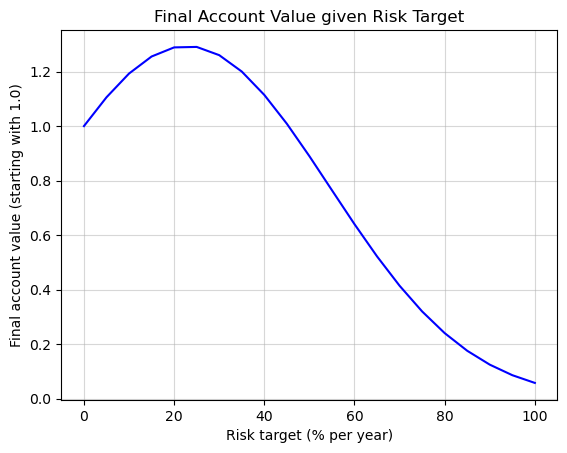

In [64]:
plt.plot(risk_targets, final_values,'b-')
plt.xlabel('Risk target (% per year)')
plt.ylabel('Final account value (starting with 1.0)')
plt.title('Final Account Value given Risk Target')
plt.grid(True, alpha=0.5) 
plt.show()